**Importing Dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import pickle

In [2]:
df = pd.read_csv('Rainfall.csv')

In [3]:
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [4]:
df.shape

(366, 12)

In [5]:
for column in df.columns:
    print(column,df[column].min())

day 1
pressure  998.5
maxtemp 7.1
temparature 4.9
mintemp 3.1
dewpoint -0.4
humidity  36
cloud  0
rainfall no
sunshine 0.0
         winddirection 10.0
windspeed 4.4


In [11]:
df['windspeed'].unique()

array([26.3, 15.3, 14.2, 16.9, 13.7, 14.5, 21.5, 14.3, 39.3, 37.7, 23.3,
       23.9, 24.4, 33.2, 37.5, 40. , 23.4, 28.4, 38. , 50.6, 26.2, 35.3,
       55.5, 59.5, 28.7, 21.3, 29.6, 28.8, 25. , 21.2, 43.1, 31.9, 27.3,
        9.1, 44.7, 20.5, 16.7, 17.2, 22. , 15.8, 13.9, 10.2, 33.5, 23.5,
       19.2, 18.6, 22.2, 19.3, 28. , 20.4, 15.2,  9.2, 34.2, 27.1, 14.7,
       15.4, 13.3,  6.6, 13.8, 15.1, 39.7, 36. , 22.8, 26.7, 26.5, 13.1,
       12.5, 38.3, 42. , 19.4, 13.4, 14.6, 26.9, 14.8,  4.5,  8.3,  8. ,
       20. , 10. , 17.3, 31.8, 29.8, 11.2, 16. , 19.6, 20.9,  7.3, 11.1,
       13. ,  8.5, 24.2, 20.2, 30.5, 27. , 23.7, 11.8, 15.5, 12.1,  9.5,
       16.3, 12. , 26. , 28.6, 24.9, 28.3, 15.7, 21.9, 39.5, 30.3, 26.4,
       22.3, 25.9, 11.3,  7.9,  7.4, 16.2, 34.8, 32.5, 24. , 19. , 25.2,
       31.7, 27.4, 20.8,  9.8, 12.6,  nan, 24.3, 30. , 29.3, 23.2, 12.8,
       19.8, 12.4, 10.9,  9.6,  9. , 11.9, 26.1, 25.1, 33. , 22.5, 24.8,
       18.8, 22.4, 22.6, 12.3, 21.6, 17.5, 16.1, 14

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [6]:
# removing all the empty spaces from the feature names
df.columns = df.columns.str.strip()

In [7]:
df.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [8]:
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [9]:
df = df.drop(columns=['day'])

In [10]:
df.isna().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64

In [11]:
df['winddirection'].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [12]:
df['winddirection'] = df['winddirection'].fillna(df['winddirection'].mode()[0])
df['windspeed'] = df['windspeed'].fillna(df['windspeed'].mode()[0])

In [13]:
df.isna().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

In [14]:
df['rainfall'].unique()

array(['yes', 'no'], dtype=object)

In [15]:
df['rainfall'] = df['rainfall'].map({"yes":1,"no":0})

In [16]:
df.rainfall.unique()

array([1, 0], dtype=int64)

**EDA**

In [17]:
sns.set(style="whitegrid")

In [18]:
df.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.284153,21.517760
std,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.722827,10.062633
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.725000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.825000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


In [19]:
df.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

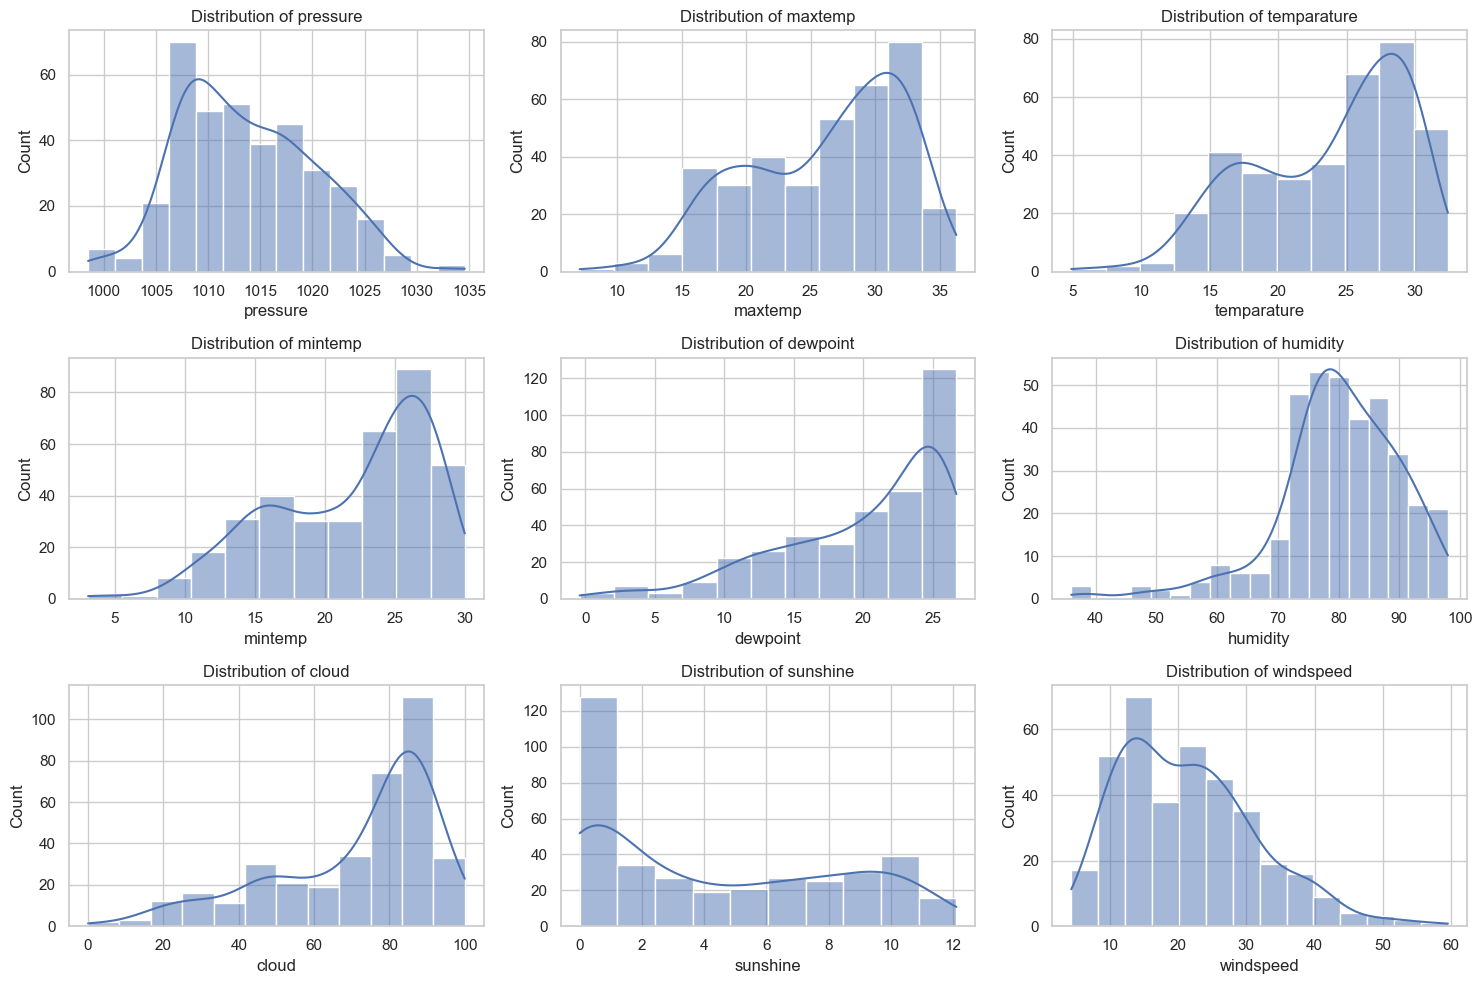

In [20]:
plt.figure(figsize=(15,10))

for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
                            'cloud', 'sunshine', 'windspeed'],1):
    plt.subplot(3,3,i)
    sns.histplot(df[column],kde=True)
    plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

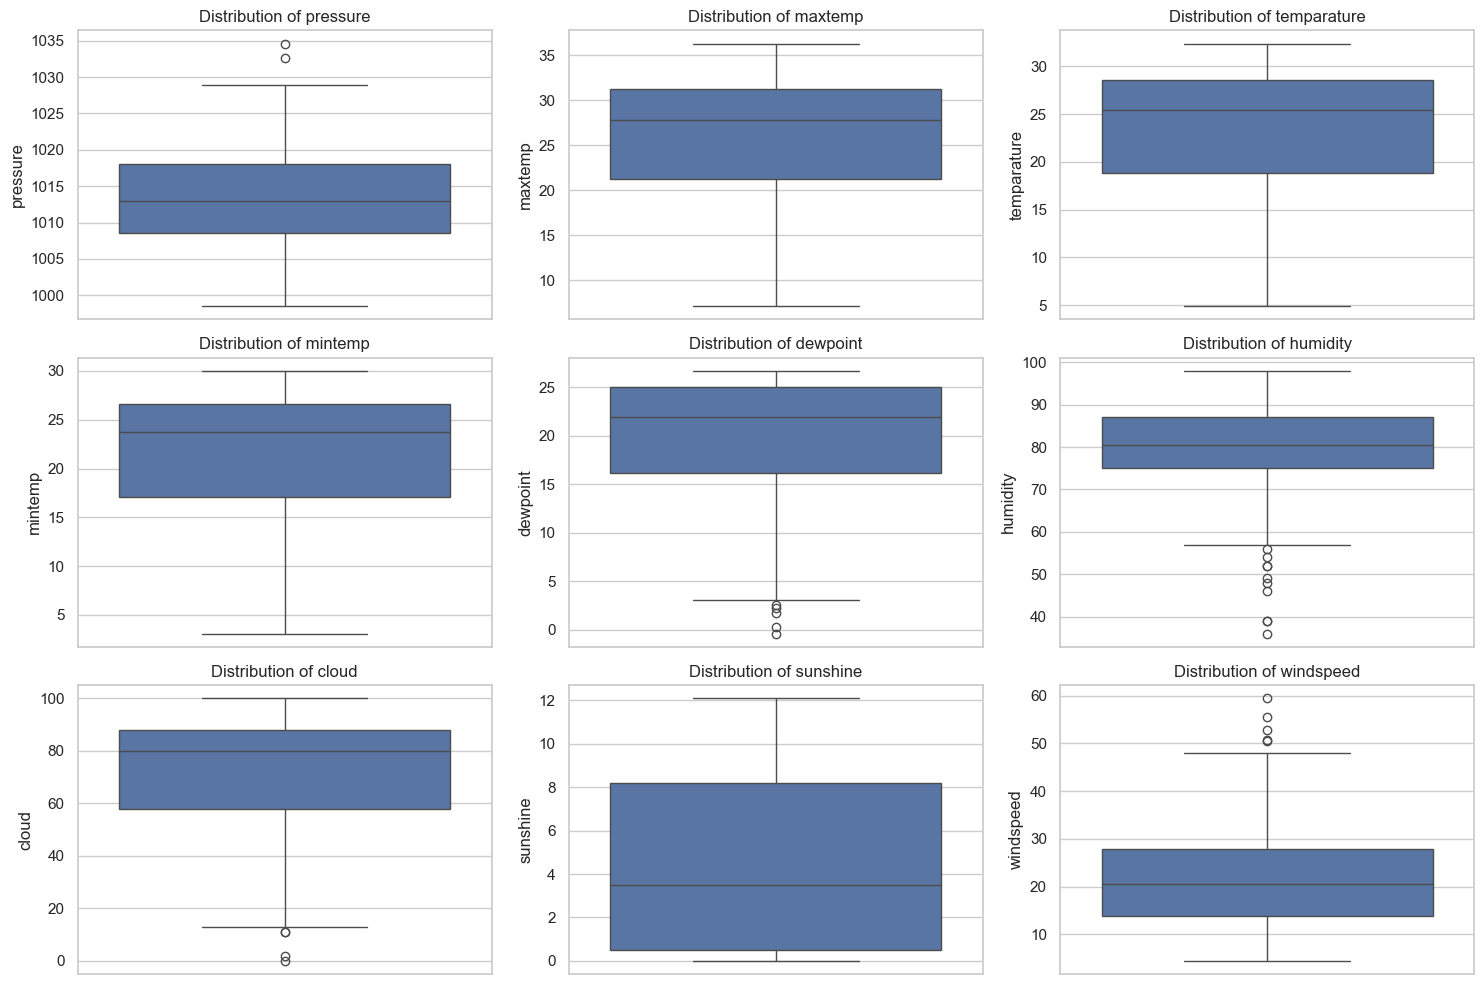

In [21]:
plt.figure(figsize=(15,10))

for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
                            'cloud', 'sunshine', 'windspeed'],1):
    plt.subplot(3,3,i)
    sns.boxplot(df[column])
    plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

When we run our data on models like Logistic Regression, Linear Regression, SVM etc it is expected data should be standardize so we should standardize our data, but here since we are using tree based model - RandomForest we dont need to standardize our data... 

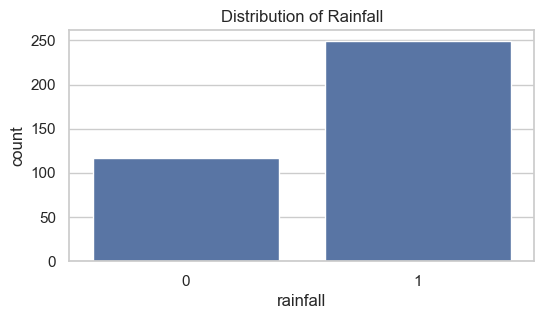

In [22]:
plt.figure(figsize=(6,3))
sns.countplot(x='rainfall',data=df)
plt.title("Distribution of Rainfall")
plt.show()

Class Imbalance 

In [23]:
df.corr()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
pressure,1.000000,-0.829088,-0.851780,-0.839851,-0.860232,-0.274907,0.005621,-0.089275,-0.198171,-0.656828,0.375391
maxtemp,-0.829088,1.000000,0.986193,0.961534,0.899829,0.021882,-0.289765,-0.101003,0.507416,0.625447,-0.443311
temparature,-0.851780,0.986193,1.000000,0.990187,0.936866,0.092030,-0.205895,-0.037360,0.420545,0.645266,-0.394653
mintemp,-0.839851,0.961534,0.990187,1.000000,0.944515,0.139040,-0.156097,-0.007697,0.368288,0.629738,-0.360152
dewpoint,-0.860232,0.899829,0.936866,0.944515,1.000000,0.425282,0.044635,0.139916,0.185234,0.623952,-0.379535
humidity,-0.274907,0.021882,0.092030,0.139040,0.425282,1.000000,0.655493,0.489623,-0.563579,0.099471,-0.077635
cloud,0.005621,-0.289765,-0.205895,-0.156097,0.044635,0.655493,1.000000,0.625766,-0.848334,-0.077037,0.257489
rainfall,-0.089275,-0.101003,-0.037360,-0.007697,0.139916,0.489623,0.625766,1.000000,-0.552519,-0.015058,0.152974
sunshine,-0.198171,0.507416,0.420545,0.368288,0.185234,-0.563579,-0.848334,-0.552519,1.000000,0.251374,-0.299591
winddirection,-0.656828,0.625447,0.645266,0.629738,0.623952,0.099471,-0.077037,-0.015058,0.251374,1.000000,-0.217611


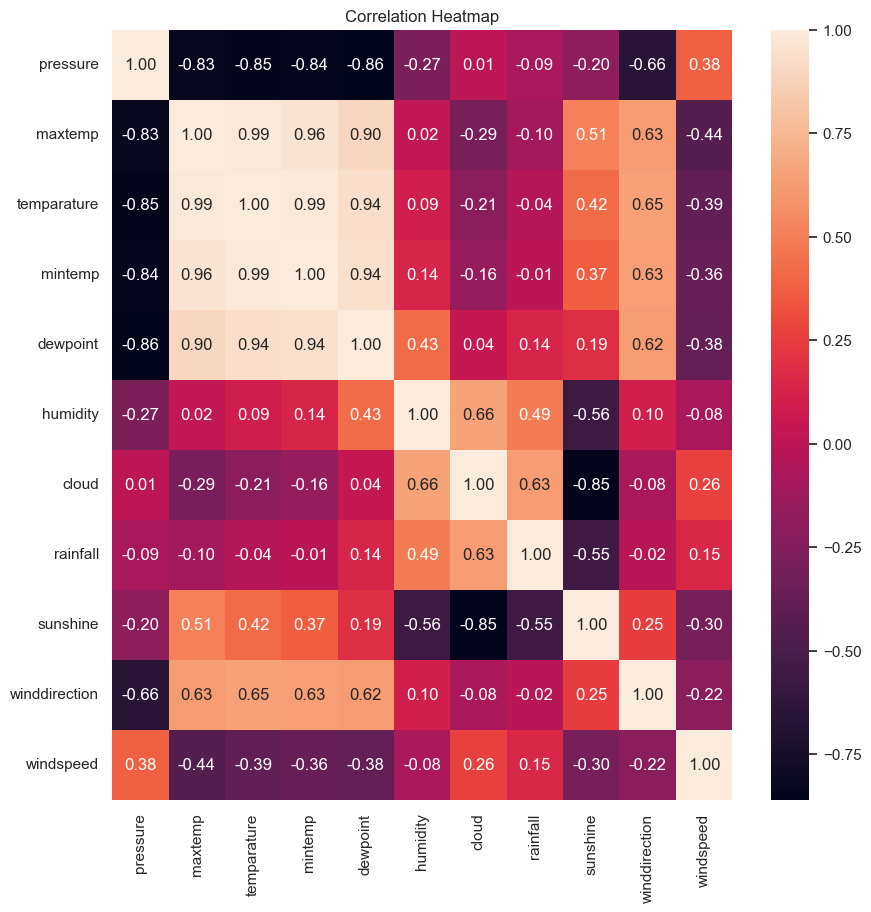

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

We can observe that some features are highly correlated to each other, so we can drop all and keep only one in our dataset for training

**Data Preprocessing**

In [26]:
# dropping highly correlated columns
df = df.drop(columns=['mintemp','maxtemp','temparature'])

In [27]:
df.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,19.9,95,81,1,0.0,40.0,13.7


In [28]:
# Down Sampling
df['rainfall'].unique()

array([1, 0], dtype=int64)

In [29]:
df['rainfall'].value_counts()

rainfall
1    249
0    117
Name: count, dtype: int64

In [30]:
minority_class= df[df['rainfall']==0]
majority_class= df[df['rainfall']==1]

In [32]:
print(minority_class.shape)
print(majority_class.shape)

(117, 8)
(249, 8)


In [35]:
# Down sampling majority class to match the minority class
df_majority_downsampled = resample(majority_class,replace=False,n_samples=len(minority_class),random_state=42) 

In [36]:
df_majority_downsampled.shape

(117, 8)

In [37]:
df_dowunsampled = pd.concat([df_majority_downsampled,minority_class])

In [38]:
df_dowunsampled.shape

(234, 8)

In [39]:
df_dowunsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
188,1005.9,25.6,77,53,1,10.5,270.0,11.3
9,1017.5,15.5,85,91,1,0.0,70.0,37.7
137,1012.3,20.1,80,86,1,0.3,80.0,39.5
89,1018.3,16.3,79,89,1,2.4,40.0,14.8
157,1008.8,24.7,91,80,1,2.2,20.0,11.2


In [40]:
# shuffling the dataset
df_dowunsampled = df_dowunsampled.sample(frac=1, random_state=42).reset_index(drop=True)

In [41]:
df_dowunsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1022.2,14.1,78,90,1,0.0,30.0,28.5
1,1013.4,19.5,69,17,0,10.5,70.0,12.4
2,1006.1,24.4,74,27,0,10.8,220.0,8.7
3,1007.6,24.8,85,84,1,1.8,70.0,34.8
4,1021.2,8.4,66,18,0,10.1,20.0,24.4


In [42]:
df_dowunsampled['rainfall'].value_counts()

rainfall
1    117
0    117
Name: count, dtype: int64

**Splitting The dataset**

In [49]:
X = df_dowunsampled.drop('rainfall',axis=1)
y = df_dowunsampled['rainfall']

In [52]:
print(X.shape)
print(y.shape)

(234, 7)
(234,)


In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

**Model Training**

In [63]:
rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    "max_features": ['sqrt','log2'],
    "criterion": ['gini', 'entropy', 'log_loss'],
    "max_depth": [None,10,20,30],
    "min_samples_split": [2,5,10],
    "min_samples_leaf": [1,2,4]
}

In [64]:
grid_serach_cv = GridSearchCV(estimator=rf_model,param_grid=param_grid,cv=5,n_jobs=1,verbose=2)
grid_serach_cv.fit(X_train,y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [65]:
best_rf_model = grid_serach_cv.best_estimator_
print("Best parameters for Random Forest",best_rf_model)

Best parameters for Random Forest RandomForestClassifier(min_samples_split=10, random_state=42)


**Model Evaluation**

In [66]:
cv_scores = cross_val_score(best_rf_model,X_train,y_train,cv=5)
print("Cross Validation Scores: ",cv_scores)
print("Cross Validation Score Mean: ",cv_scores.mean())

Cross Validation Scores:  [0.71052632 0.81578947 0.83783784 0.83783784 0.91891892]
Cross Validation Score Mean:  0.8241820768136557


In [68]:
# Test set performance
y_pred = best_rf_model.predict(X_test)

print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Classification Report: ",classification_report(y_pred,y_test))
print("Confusion Matrix: ",confusion_matrix(y_test,y_pred))

Accuracy:  0.7446808510638298
Classification Report:                precision    recall  f1-score   support

           0       0.71      0.77      0.74        22
           1       0.78      0.72      0.75        25

    accuracy                           0.74        47
   macro avg       0.75      0.75      0.74        47
weighted avg       0.75      0.74      0.74        47

Confusion Matrix:  [[17  7]
 [ 5 18]]


In [69]:
# save model and feature names to a pickle file
model_data ={
    "model": best_rf_model, 
    "feature_names": X.columns.tolist()
}

with open("model.pkl","wb") as f:
    pickle.dump(model_data,f)